# Computer Vision. Images as Tensors

### Computer Vision (CV) is a field that studies how computers can gain some degree of understanding
### from digital images and/or video. Understanding in this definition has a rather broad meaning - 
### it can range from being able to distinguish between a cat and a dog on the picture, to more complex 
### tasks such as describing the image in natural language.

# The most common problems of computer vision include:

### Image Classification is the simplest task, when we need to classify an image into one of many pre-defined 
### categories, for example, distinguish a cat from a dog on a photograph, or recognize a handwritten digit.

### Object Detection is a bit more difficult task, in which we need to find known objects on the picture and 
### localize them, that is, return the bounding box for each of recognized objects.

### Segmentation is similar to object detection, but instead of giving bounding box we need to return an exact
### pixel map outlining each of the recognized objects.

# Import packages and load the MNIST Dataset

In [1]:
#Import the packages needed.
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

### PyTorch has a number of datasets available right from the library. Here we are using the well-known MNIST 
### dataset of handwritten digits, available through torchvison.datasets.MNIST in PyTorch. 
### The dataset object returns the data in the form of Python Imagine Library (PIL) images, which we convert 
### to tensors by passing a transform=ToTensor() parameter.

In [2]:
from torchvision.transforms import ToTensor

data_train = torchvision.datasets.MNIST('./data',
        download=True,train=True,transform=ToTensor())
data_test = torchvision.datasets.MNIST('./data',
        download=True,train=False,transform=ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# Visualizing the dataset
### Now that we have downloaded the dataset we can visualize some of the digits

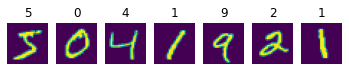

In [3]:
fig,ax = plt.subplots(1,7)
for i in range(7):
    ax[i].imshow(data_train[i][0].view(28,28))
    ax[i].set_title(data_train[i][1])
    ax[i].axis('off')

# Dataset structure
### We have a total of 6000 training images and 1000 testing images. Its important to split out the data for
### training and testing. We also want to do some data exploration to get a better idea of what our data looks
### like

## Each sample is a tuple in the following structure:

### First element is the actual image of a digit, represented by a tensor of shape 1x28x28
### Second element is a label that specifies which digit is represented by the tensor. It is a tensor that
### contains a number from 0 to 9.
### data_train is a training dataset that we will use to train our model on. 
### data_test is a smaller test dataset that we can use to verify our model.

In [4]:
print('Training samples:',len(data_train))
print('Test samples:',len(data_test))

print('Tensor size:',data_train[0][0].size())
print('First 10 digits are:', [data_train[i][1] for i in range(10)])

Training samples: 60000
Test samples: 10000
Tensor size: torch.Size([1, 28, 28])
First 10 digits are: [5, 0, 4, 1, 9, 2, 1, 3, 1, 4]


### All pixel intensities of the images are represented by floating-point values in between 0 and 1:



In [5]:
print('Min intensity value: ',data_train[0][0].min().item())
print('Max intensity value: ',data_train[0][0].max().item())

Min intensity value:  0.0
Max intensity value:  1.0
